In [ ]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
import keras

In [ ]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [ ]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y testing matrix shape (10000, 10)


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=2)

Epoch 1/10
469/469 - 2s - loss: 0.0136 - accuracy: 0.9953 - 2s/epoch - 5ms/step
Epoch 2/10
469/469 - 2s - loss: 0.0078 - accuracy: 0.9975 - 2s/epoch - 4ms/step
Epoch 3/10
469/469 - 2s - loss: 0.0121 - accuracy: 0.9961 - 2s/epoch - 3ms/step
Epoch 4/10
469/469 - 2s - loss: 0.0091 - accuracy: 0.9970 - 2s/epoch - 3ms/step
Epoch 5/10
469/469 - 2s - loss: 0.0094 - accuracy: 0.9970 - 2s/epoch - 3ms/step
Epoch 6/10
469/469 - 2s - loss: 0.0050 - accuracy: 0.9983 - 2s/epoch - 3ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0105 - accuracy: 0.9967 - 2s/epoch - 3ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0054 - accuracy: 0.9983 - 2s/epoch - 3ms/step
Epoch 9/10
469/469 - 2s - loss: 0.0051 - accuracy: 0.9986 - 2s/epoch - 3ms/step
Epoch 10/10
469/469 - 2s - loss: 0.0073 - accuracy: 0.9980 - 2s/epoch - 3ms/step


In [ ]:
score = model.evaluate(X_test, Y_test)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])
print(score)

313/313 [==============================] - 1s 4ms/step - loss: 0.1233 - accuracy: 0.9756
Test score:  0.12334713339805603
Test accuracy:  0.975600004196167
[0.12334713339805603, 0.975600004196167]


In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

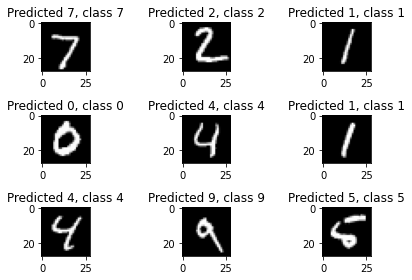

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
  plt.title("Predicted {}, class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

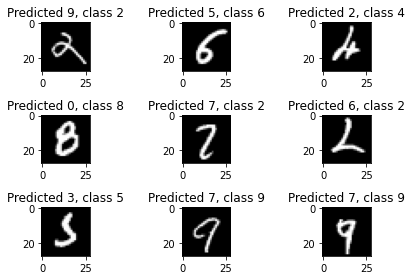

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
  plt.title("Predicted {}, class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()

# 12주차

In [3]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [6]:
! git clone https://github.com/yhlee1627/deeplearning.git
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols = [3], engine='python', skipfooter=3)
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')

fatal: destination path 'deeplearning' already exists and is not an empty directory.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size = 0.2, shuffle = False)
print(len(train_data), len(test_data))

89 23


In [10]:
def create_dataset(dataset, look_back):
  x_data =[]
  y_data =[]
  for i in range(len(dataset)-look_back-1):
    data = dataset[i:(i+look_back), 0]
    x_data.append(data)
    y_data.append(dataset[i+look_back, 0])
  return np.array(x_data), np.array(y_data)

In [11]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3) (85,)
(19, 3) (19,)


In [12]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(85, 1, 3)
(19, 1, 3)


In [13]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(1, look_back)))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
85/85 [==============================] - 3s 4ms/step - loss: 0.0029
Epoch 2/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 3/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 4/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 5/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 6/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 7/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 8/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 9/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 10/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 11/100
85/85 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 12/100
85/85 [==============================] - 0s 4ms/step - loss: 9.1672e-04
Epoch 13/100
85/85 [=============

In [15]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

In [16]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

Train Score: 193.32 RMSE
Test Score: 270.14 RMSE
